In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## The Problem-Average Error Rate

The examples thus far suggest that having only a small number of training samples causes the classifier to not generalize well, leading to poor performance on new data. The error rate is typically a function of the number $n$ of training samples, decreasing to a minimum value as $n \to \infty$.

To analyze this error rate analytically, the following steps must be carried out:

1. Estimate the unknown parameters from samples.
2. Use these estimates to determine the classifier.
3. Calculate the error rate for the resulting classifier.

In general, this analysis is complex because the error rate depends on:
- The specific training patterns,
- How they are used to determine the classifier, and
- The underlying probability structure.

Using histogram approximations to the unknown probability densities and averaging appropriately, we can derive useful insights.

---

## Assumptions and Simplifications

1. **Equal Prior Probabilities**: Assume the two categories have equal prior probabilities $P(\omega_1) = P(\omega_2) = \frac{1}{2}$.
2. **Partitioning the Feature Space**: Divide the feature space into $m$ disjoint cells $C_1, C_2, \ldots, C_m$. Assume that the conditional densities $p(x|\omega_1)$ and $p(x|\omega_2)$ do not vary significantly within any cell. This reduces the problem to the discrete case.

Define:
- $p_i = P(x \in C_i | \omega_1)$,
- $q_i = P(x \in C_i | \omega_2)$.

The vectors $\mathbf{p} = (p_1, p_2, \ldots, p_m)^T$ and $\mathbf{q} = (q_1, q_2, \ldots, q_m)^T$ determine the probability structure of the problem.

---

## Bayes Error Rate

The Bayes error rate is given by:

$$
P(E | \mathbf{p}, \mathbf{q}) = \frac{1}{2} \sum_{i=1}^m \min(p_i, q_i).
$$

---

## Error Rate with Estimated Parameters

Suppose:
- Half of the samples are labeled $\omega_1$,
- Half are labeled $\omega_2$,
- $n_{ij}$ represents the number of samples in cell $C_i$ labeled $\omega_j$.

Using maximum likelihood estimates:
$$
\hat{p}_i = \frac{2 n_{i1}}{n}, \quad \hat{q}_i = \frac{2 n_{i2}}{n}.
$$

A new feature vector falling in $C_i$ will be assigned to $\omega_1$ if $n_{i1} > n_{i2}$.

The probability of error for the resulting classifier is:
$$
P(E | \mathbf{p}, \mathbf{q}, D) = \frac{1}{2} \sum_{n_{i1} > n_{i2}} q_i + \frac{1}{2} \sum_{n_{i1} \leq n_{i2}} p_i.
$$

To evaluate this, we need:
- The true conditional probabilities $\mathbf{p}$ and $\mathbf{q}$,
- The set of training patterns $D$.

---

## Averaging Over Training Patterns

Different random sets of $n$ patterns yield different values for $P(E | \mathbf{p}, \mathbf{q}, D)$. By using the multinomial distribution for $n_{ij}$, we can compute the average error rate over all possible sets of $n$ patterns:

$$
P(E | \mathbf{p}, \mathbf{q}, n).
$$

---

## Problem-Average Error Rate

To eliminate dependence on the specific problem, assume:
1. The vectors $\mathbf{p}$ and $\mathbf{q}$ are uniformly distributed over their respective simplexes:
$$
\sum_{i=1}^m p_i = 1, \quad p_i \geq 0, \quad \sum_{i=1}^m q_i = 1, \quad q_i \geq 0.
$$

Averaging $P(E | \mathbf{p}, \mathbf{q}, n)$ over all possible problems gives the problem-average error rate $P(E | m, n)$, depending only on $m$, $n$, and the prior distributions.

---

## Key Insights

1. **Infinite Training Samples**:
   - With $n \to \infty$, maximum likelihood estimates are perfect.
   - $P(E | m, \infty)$ is the average Bayes error rate, decreasing rapidly from $0.5$ at $m = 1$ to $0.25$ as $m \to \infty$.

2. **Finite Training Samples**:
   - There exists an optimal number of cells $m$ for any fixed $n$.
   - Too many cells result in most cells being empty, leading to poor classification performance.

3. **Feature Quantization**:
   - If $l$ intervals are used to divide each feature axis, with $d$ features, then $m = l^d$.
   - Beyond a certain $m$, increasing the number of features raises variance and worsens performance.

---

## Figure: Average Error Rate vs. Number of Cells

Below is a representation of the average error rate $P(E | m, n)$ for various $n$ and $m$.

$$
P(E | m, n) \text{ as a function of } m \text{ for various } n.
$$

| Number of Training Samples $(n$) | Optimal $m$ |
|-----------------------------------|---------------|
| 500                               | 200           |

For $n = 500$, the optimal $m \approx 200$ cells. The error rate increases if the number of cells or features becomes too large.

---

## Conclusion

The performance of a classifier depends on:
1. The number of training patterns $(n$),
2. The number of cells $(m$) or features used.

For finite $n$, increasing $m$ or the number of features beyond a critical point is counterproductive due to increased variance. This illustrates the **bias-variance tradeoff** in classification tasks.


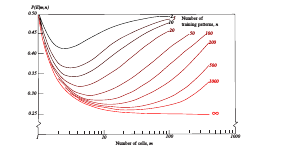

Fig.14: The probability of error E on a two-category problem for a given number of samples, n, can be estimated by splitting the feature space into m cells of equal size and classifying a test point by according to the label of the most frequently represented category in the cell. The graphs show the average error of a large number of random problems having the given n and m indicated.



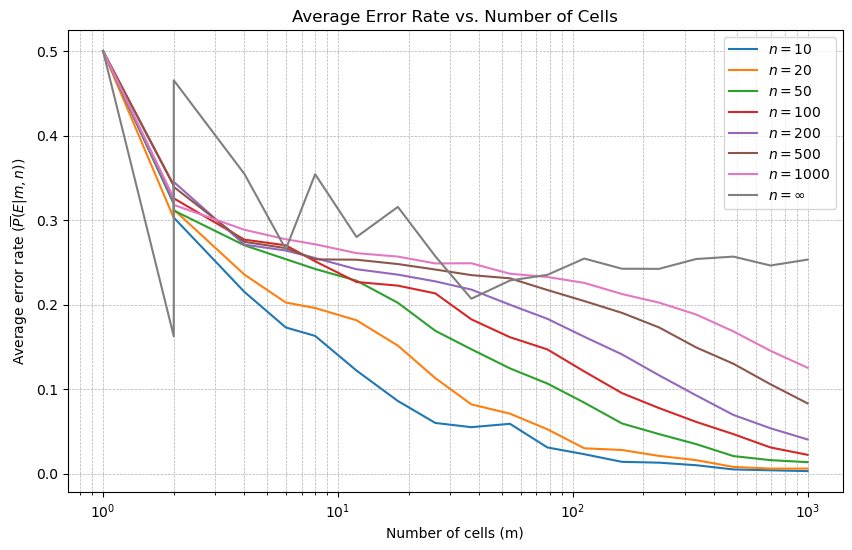

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

def generate_random_probabilities(m):
    """
    Generate random probability vectors p and q that sum to 1.
    """
    p = np.random.dirichlet(np.ones(m))
    q = np.random.dirichlet(np.ones(m))
    return p, q

def bayes_error_rate(p, q):
    """
    Calculate the Bayes error rate given vectors p and q.
    """
    return 0.5 * np.sum(np.minimum(p, q))

def classifier_error_rate(p, q, n):
    """
    Simulate the classifier error rate for finite training samples n.
    """
    m = len(p)
    n_samples_per_class = n // 2

    nij_1 = np.random.multinomial(n_samples_per_class, p)
    nij_2 = np.random.multinomial(n_samples_per_class, q)

    p_hat = 2 * nij_1 / n
    q_hat = 2 * nij_2 / n

    error = 0.5 * (np.sum(q_hat[nij_1 > nij_2]) + np.sum(p_hat[nij_1 <= nij_2]))
    return error

def average_error_rate(m, n, trials=100):
    """
    Calculate the average error rate over multiple random problems.
    """
    errors = []
    for _ in range(trials):
        p, q = generate_random_probabilities(m)
        error = classifier_error_rate(p, q, n)
        errors.append(error)
    return np.mean(errors)

def plot_error_rate():
    """
    Plot the average error rate as a function of the number of cells m
    for various numbers of training samples n.
    """
    m_values = np.logspace(0, 3, 20, dtype=int)
    n_values = [10, 20, 50, 100, 200, 500, 1000, float('inf')]

    plt.figure(figsize=(10, 6))

    for n in n_values:
        error_rates = []

        for m in m_values:
            if n == float('inf'):
                # Bayes error rate
                p, q = generate_random_probabilities(m)
                error = bayes_error_rate(p, q)
            else:
                error = average_error_rate(m, int(n), trials=100)

            error_rates.append(error)

        label = "$n = \infty$" if n == float('inf') else f"$n = {n}$"
        plt.plot(m_values, error_rates, label=label)

    plt.xscale("log")
    plt.xlabel("Number of cells (m)")
    plt.ylabel("Average error rate ($\overline{P}(E|m, n)$)")
    plt.title("Average Error Rate vs. Number of Cells")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Run the simulation and plot the results
plot_error_rate()


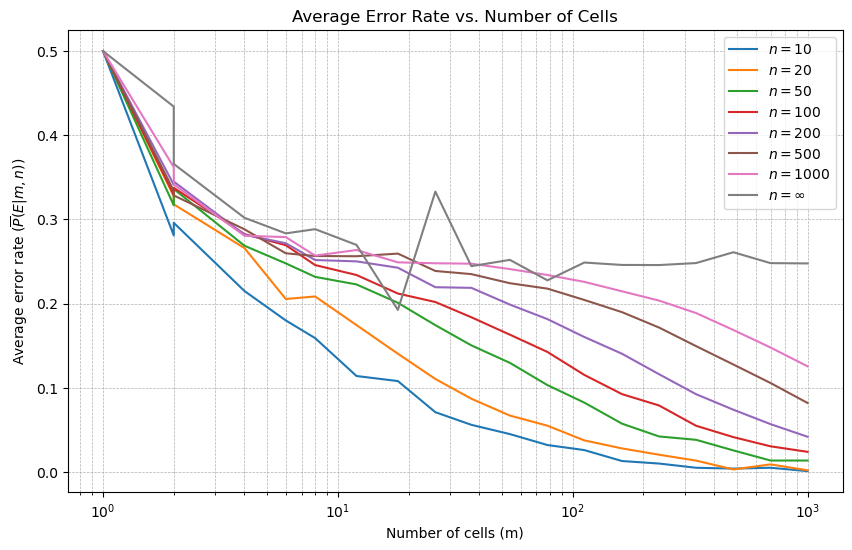

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

def generate_random_probabilities(m):
    """
    Generate random probability vectors p and q that sum to 1.
    """
    p = np.random.dirichlet(np.ones(m))
    q = np.random.dirichlet(np.ones(m))
    return p, q

def bayes_error_rate(p, q):
    """
    Calculate the Bayes error rate given vectors p and q.
    """
    return 0.5 * np.sum(np.minimum(p, q))

def classifier_error_rate(p, q, n):
    """
    Simulate the classifier error rate for finite training samples n.
    """
    m = len(p)
    n_samples_per_class = n // 2

    nij_1 = np.random.multinomial(n_samples_per_class, p)
    nij_2 = np.random.multinomial(n_samples_per_class, q)

    p_hat = 2 * nij_1 / n
    q_hat = 2 * nij_2 / n

    error = 0.5 * (np.sum(q_hat[nij_1 > nij_2]) + np.sum(p_hat[nij_1 <= nij_2]))
    return error

def average_error_rate(m, n, trials=100):
    """
    Calculate the average error rate over multiple random problems.
    """
    errors = []
    for _ in range(trials):
        p, q = generate_random_probabilities(m)
        error = classifier_error_rate(p, q, n)
        errors.append(error)
    return np.mean(errors)

def plot_error_rate():
    """
    Plot the average error rate as a function of the number of cells m
    for various numbers of training samples n.
    """
    m_values = np.logspace(0, 3, 20, dtype=int)
    n_values = [10, 20, 50, 100, 200, 500, 1000, float('inf')]

    plt.figure(figsize=(10, 6))

    for n in n_values:
        error_rates = []

        for m in m_values:
            if n == float('inf'):
                # Bayes error rate
                p, q = generate_random_probabilities(m)
                error = bayes_error_rate(p, q)
            else:
                error = average_error_rate(m, int(n), trials=100)

            error_rates.append(error)

        label = "$n = \infty$" if n == float('inf') else f"$n = {n}$"
        plt.plot(m_values, error_rates, label=label)

    plt.xscale("log")
    plt.xlabel("Number of cells (m)")
    plt.ylabel("Average error rate ($\overline{P}(E|m, n)$)")
    plt.title("Average Error Rate vs. Number of Cells")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Run the simulation and plot the results
plot_error_rate()


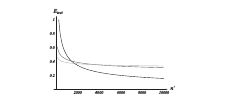

Fig.15: The test error for three classiﬁers, each fully trained on the given number n of training patterns, decreases in a typical monotonic power-law function. Notice that the rank order of the classiﬁers trained on n = 500 points diﬀers from that for n = 10000 points and the asymptotic case.


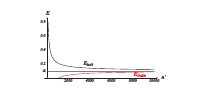

Fig.16: Test and training error of a classiﬁer fully trained on data subsets of diﬀerent size n selected randomly from the full set D. At low n , the classiﬁer can learn the category labels of the points perfectly, and thus the training error vanishes there. In the limit n → ∞, both training and test errors approach the same asymptotic value, a. If the classiﬁer is suﬃciently powerful and the training data is sampled i.i.d., then a is the Bayes error rate, EB .

## Predicting Final Performance from Learning Curves

## Introduction
Training machine learning models on very large datasets is computationally expensive. To save resources, we can estimate the performance of classifiers using smaller training subsets and extrapolate their asymptotic behavior. This is achieved through learning curves, where test error $E_{\text{test}}$ and training error $E_{\text{train}}$ are plotted against training set size $n'$.

### Learning Curve Models
The errors can be modeled using power-law functions:
$$
E_{\text{test}} = a + \frac{b}{n'^\alpha}
$$
$$
E_{\text{train}} = a - \frac{c}{n'^\beta}
$$
where:
- $a$: Asymptotic error (Bayes error for sufficiently powerful classifiers).
- $b, c$: Coefficients dependent on the task and classifier.
- $\alpha, \beta \geq 1$: Decay rates of test and training errors.

Under the assumption $\alpha = \beta$ and $b = c$, we can simplify:
$$
E_{\text{test}} + E_{\text{train}} = 2a
$$
$$
E_{\text{test}} - E_{\text{train}} = \frac{2b}{n'^\alpha}
$$

### Objective
Estimate the asymptotic error $a$ for a classifier using errors from small and intermediate training set sizes.

---



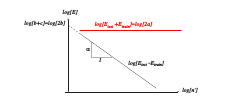

Fig.17: If the test and training errors versus training set size obey the power-law functions of Eqs. 49 & 50, then the log of the sum and log of the diﬀerence of these errors are straight lines on a log-log plot. The estimate of the asymptotic error rate a is then simply related to the height of the log[Etest + Etrain ] line, as shown.

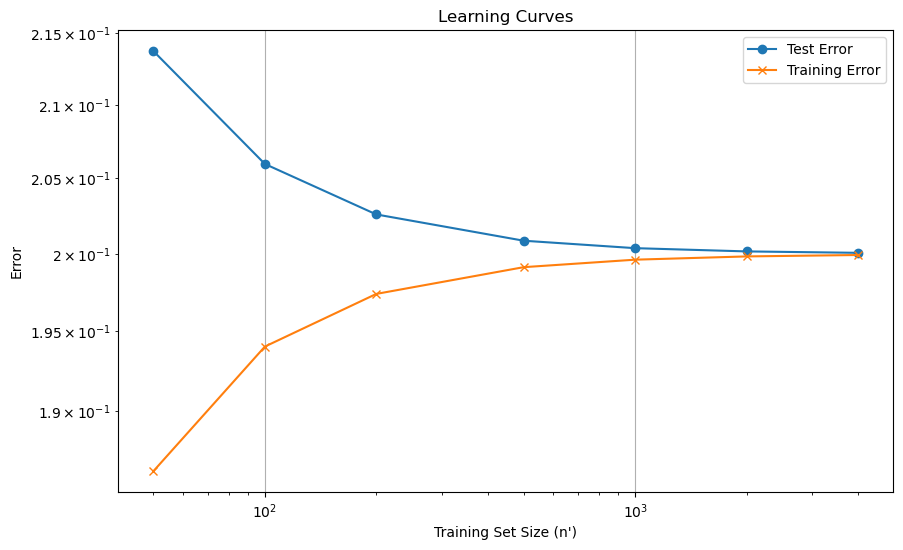

True Asymptotic Error (a): 0.2
Estimated Asymptotic Error (a): 0.2000


In [3]:
## Implementation

# Below is a Jupyter Notebook implementation.


# Helper function to compute power-law errors
def compute_errors(a, b, alpha, n_values):
    test_errors = [a + b / (n ** alpha) for n in n_values]
    train_errors = [a - b / (n ** alpha) for n in n_values]
    return test_errors, train_errors

# Function to estimate asymptotic error
def estimate_asymptotic_error(n_values, test_errors, train_errors):
    import math

    log_n = [math.log(n) for n in n_values]
    log_sum = [math.log(test + train) for test, train in zip(test_errors, train_errors)]
    log_diff = [math.log(abs(test - train)) for test, train in zip(test_errors, train_errors)]
    
    # Linear regression to estimate log[2a] from log[E_test + E_train]
    sum_slope = sum_intercept = diff_slope = diff_intercept = 0
    for log_vals, target_vals in [(log_n, log_sum), (log_n, log_diff)]:
        n = len(log_vals)
        mean_x = sum(log_vals) / n
        mean_y = sum(target_vals) / n
        cov_xy = sum((x - mean_x) * (y - mean_y) for x, y in zip(log_vals, target_vals))
        var_x = sum((x - mean_x) ** 2 for x in log_vals)
        slope = cov_xy / var_x
        intercept = mean_y - slope * mean_x

        if target_vals == log_sum:
            sum_slope, sum_intercept = slope, intercept
        else:
            diff_slope, diff_intercept = slope, intercept

    # Estimate asymptotic error
    a_estimate = math.exp(sum_intercept) / 2
    return a_estimate

# Generate synthetic data
a_true = 0.2
b_true = 1.5
alpha_true = 1.2
n_values = [50, 100, 200, 500, 1000, 2000, 4000]

test_errors, train_errors = compute_errors(a_true, b_true, alpha_true, n_values)

# Estimate asymptotic error
a_estimated = estimate_asymptotic_error(n_values, test_errors, train_errors)

# Plot results
def plot_errors(n_values, test_errors, train_errors):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, test_errors, label="Test Error", marker="o")
    plt.plot(n_values, train_errors, label="Training Error", marker="x")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Training Set Size (n')")
    plt.ylabel("Error")
    plt.title("Learning Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_errors(n_values, test_errors, train_errors)

# Display results
print(f"True Asymptotic Error (a): {a_true}")
print(f"Estimated Asymptotic Error (a): {a_estimated:.4f}")



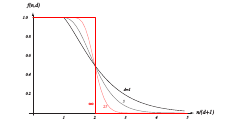

Fig.18: The fraction of dichotomies of n points in d dimensions that are linear, as given by Eq. 53.

## Predicting Final Performance from Learning Curves

## Introduction
Training machine learning models on very large datasets is computationally expensive. To save resources, we can estimate the performance of classifiers using smaller training subsets and extrapolate their asymptotic behavior. This is achieved through learning curves, where test error $E_{\text{test}}$ and training error $E_{\text{train}}$ are plotted against training set size $n'$.

### Learning Curve Models
The errors can be modeled using power-law functions:
$$
E_{\text{test}} = a + \frac{b}{n'^\alpha}
$$
$$
E_{\text{train}} = a - \frac{c}{n'^\beta}
$$
where:
- $a$: Asymptotic error (Bayes error for sufficiently powerful classifiers).
- $b, c$: Coefficients dependent on the task and classifier.
- $\alpha, \beta \geq 1$: Decay rates of test and training errors.

Under the assumption $\alpha = \beta$ and $b = c$, we can simplify:
$$
E_{\text{test}} + E_{\text{train}} = 2a
$$
$$
E_{\text{test}} - E_{\text{train}} = \frac{2b}{n'^\alpha}
$$

### Objective
Estimate the asymptotic error $a$ for a classifier using errors from small and intermediate training set sizes.

---



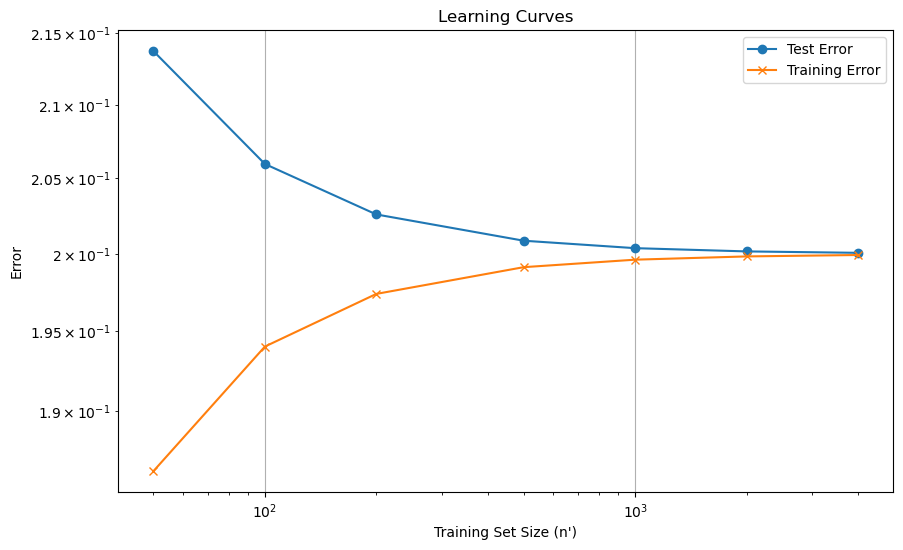

True Asymptotic Error (a): 0.2
Estimated Asymptotic Error (a): 0.2000


In [4]:
## Implementation

#Below is a Jupyter Notebook implementation.

# Helper function to compute power-law errors
def compute_errors(a, b, alpha, n_values):
    test_errors = [a + b / (n ** alpha) for n in n_values]
    train_errors = [a - b / (n ** alpha) for n in n_values]
    return test_errors, train_errors

# Function to estimate asymptotic error
def estimate_asymptotic_error(n_values, test_errors, train_errors):
    import math

    log_n = [math.log(n) for n in n_values]
    log_sum = [math.log(test + train) for test, train in zip(test_errors, train_errors)]
    log_diff = [math.log(abs(test - train)) for test, train in zip(test_errors, train_errors)]
    
    # Linear regression to estimate log[2a] from log[E_test + E_train]
    sum_slope = sum_intercept = diff_slope = diff_intercept = 0
    for log_vals, target_vals in [(log_n, log_sum), (log_n, log_diff)]:
        n = len(log_vals)
        mean_x = sum(log_vals) / n
        mean_y = sum(target_vals) / n
        cov_xy = sum((x - mean_x) * (y - mean_y) for x, y in zip(log_vals, target_vals))
        var_x = sum((x - mean_x) ** 2 for x in log_vals)
        slope = cov_xy / var_x
        intercept = mean_y - slope * mean_x

        if target_vals == log_sum:
            sum_slope, sum_intercept = slope, intercept
        else:
            diff_slope, diff_intercept = slope, intercept

    # Estimate asymptotic error
    a_estimate = math.exp(sum_intercept) / 2
    return a_estimate

# Generate synthetic data
a_true = 0.2
b_true = 1.5
alpha_true = 1.2
n_values = [50, 100, 200, 500, 1000, 2000, 4000]

test_errors, train_errors = compute_errors(a_true, b_true, alpha_true, n_values)

# Estimate asymptotic error
a_estimated = estimate_asymptotic_error(n_values, test_errors, train_errors)

# Plot results
def plot_errors(n_values, test_errors, train_errors):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, test_errors, label="Test Error", marker="o")
    plt.plot(n_values, train_errors, label="Training Error", marker="x")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Training Set Size (n')")
    plt.ylabel("Error")
    plt.title("Learning Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_errors(n_values, test_errors, train_errors)

# Display results
print(f"True Asymptotic Error (a): {a_true}")
print(f"Estimated Asymptotic Error (a): {a_estimated:.4f}")


# Predicting Final Performance from Learning Curves

## Introduction
Training machine learning models on very large datasets is computationally expensive. To save resources, we can estimate the performance of classifiers using smaller training subsets and extrapolate their asymptotic behavior. This is achieved through learning curves, where test error \(E_{\text{test}}\) and training error \(E_{\text{train}}\) are plotted against training set size \(n'\).

### Learning Curve Models
The errors can be modeled using power-law functions:
\[
E_{\text{test}} = a + \frac{b}{n'^\alpha}
\]
\[
E_{\text{train}} = a - \frac{c}{n'^\beta}
\]
where:
- \(a\): Asymptotic error (Bayes error for sufficiently powerful classifiers).
- \(b, c\): Coefficients dependent on the task and classifier.
- \(\alpha, \beta \geq 1\): Decay rates of test and training errors.

Under the assumption \(\alpha = \beta\) and \(b = c\), we can simplify:
\[
E_{\text{test}} + E_{\text{train}} = 2a
\]
\[
E_{\text{test}} - E_{\text{train}} = \frac{2b}{n'^\alpha}
\]

### Objective
Estimate the asymptotic error \(a\) for a classifier using errors from small and intermediate training set sizes.

---



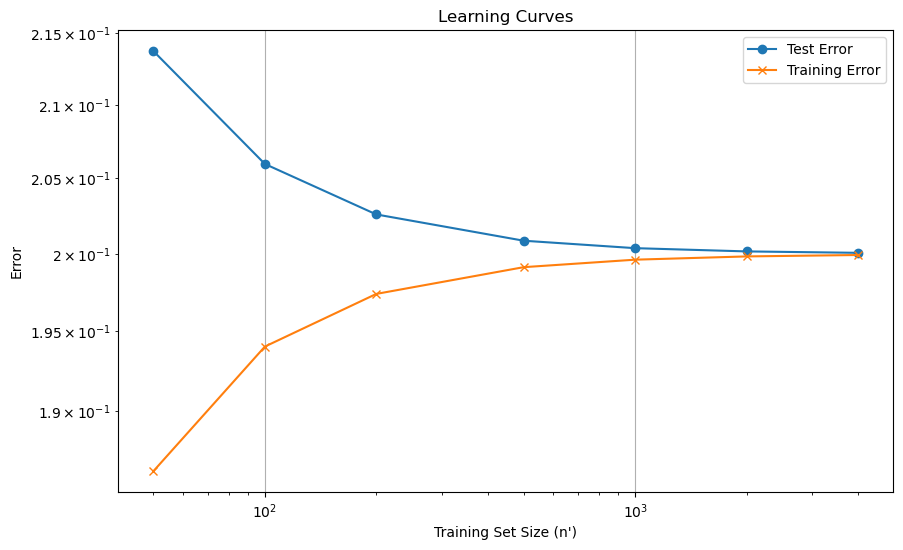

True Asymptotic Error (a): 0.2
Estimated Asymptotic Error (a): 0.2000


In [5]:
## Implementation

# Below is a Jupyter Notebook implementation.


# Helper function to compute power-law errors
def compute_errors(a, b, alpha, n_values):
    test_errors = [a + b / (n ** alpha) for n in n_values]
    train_errors = [a - b / (n ** alpha) for n in n_values]
    return test_errors, train_errors

# Function to estimate asymptotic error
def estimate_asymptotic_error(n_values, test_errors, train_errors):
    import math

    log_n = [math.log(n) for n in n_values]
    log_sum = [math.log(test + train) for test, train in zip(test_errors, train_errors)]
    log_diff = [math.log(abs(test - train)) for test, train in zip(test_errors, train_errors)]
    
    # Linear regression to estimate log[2a] from log[E_test + E_train]
    sum_slope = sum_intercept = diff_slope = diff_intercept = 0
    for log_vals, target_vals in [(log_n, log_sum), (log_n, log_diff)]:
        n = len(log_vals)
        mean_x = sum(log_vals) / n
        mean_y = sum(target_vals) / n
        cov_xy = sum((x - mean_x) * (y - mean_y) for x, y in zip(log_vals, target_vals))
        var_x = sum((x - mean_x) ** 2 for x in log_vals)
        slope = cov_xy / var_x
        intercept = mean_y - slope * mean_x

        if target_vals == log_sum:
            sum_slope, sum_intercept = slope, intercept
        else:
            diff_slope, diff_intercept = slope, intercept

    # Estimate asymptotic error
    a_estimate = math.exp(sum_intercept) / 2
    return a_estimate

# Generate synthetic data
a_true = 0.2
b_true = 1.5
alpha_true = 1.2
n_values = [50, 100, 200, 500, 1000, 2000, 4000]

test_errors, train_errors = compute_errors(a_true, b_true, alpha_true, n_values)

# Estimate asymptotic error
a_estimated = estimate_asymptotic_error(n_values, test_errors, train_errors)

# Plot results
def plot_errors(n_values, test_errors, train_errors):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, test_errors, label="Test Error", marker="o")
    plt.plot(n_values, train_errors, label="Training Error", marker="x")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Training Set Size (n')")
    plt.ylabel("Error")
    plt.title("Learning Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_errors(n_values, test_errors, train_errors)

# Display results
print(f"True Asymptotic Error (a): {a_true}")
print(f"Estimated Asymptotic Error (a): {a_estimated:.4f}")


## Mixture of Experts Architecture

In this section, we discuss the mixture of experts (MoE) architecture, which leverages component classiﬁers (or "experts") to model a complex distribution or task. The key idea is to use multiple specialized models to capture different regions of the input space and combine their outputs based on a gating mechanism.

## 1. Mixture Model Assumptions

We assume that each pattern $x $ is generated by a mixture model where:
$$
P(r|x, \theta_{00}) \quad \text{represents the selection of a fundamental process } r,
$$
and
$$
P(y|x, \theta_{0r}) \quad \text{represents the output of that process } r.
$$
The overall probability of generating an output $ y $ for input $ x $ is given by:
$$
P(y|x, \Theta_{0}) = \sum_{r=1}^{k} P(r|x, \eta_{0}) P(y|x, \theta_{0r}),
$$
where $ \Theta_{0} $ includes all model parameters $ \theta_{00}, \theta_{01}, \ldots, \theta_{0k} $.

## 2. Ensemble Classifier Architecture

The architecture of an ensemble classifier based on the mixture model is depicted in Fig.19. It consists of $ k $ component classiﬁers (experts), each $ r $, which output $ c $ scalar discriminant values $ g(x, \theta_r) $ for each category $ j $:
$$
g_{rj} = 1 \quad \forall j
$$

## 3. Conditional Mean and Mixture Density

The conditional mean of the mixture density is calculated using:
$$
\mu = E[y|x, \Theta] = \sum_{r=1}^{k} w_r \mu_r,
$$
where $ w_r $ is the weight determined by the gating subsystem, and $ \mu_r $ represents the conditional mean associated with $P(y|x, \theta_{0r}) $.

## 4. Training with Maximum Likelihood

Training the mixture-of-experts architecture involves maximizing the log-likelihood for $ n $ training patterns $ x_1, x_2, \ldots, x_n $:
$$
l(D, \Theta) = \sum_{i=1}^{n} \sum_{r=1}^{k} P(r|y_i, x_i) \ln P(y_i|x_i, \theta_r),
$$
where the derivatives for the training parameters are given by:
$$
\frac{\partial l(D, \Theta)}{\partial \mu_r} = \sum_{i=1}^{n} P(r|y_i, x_i) \ln[P(y_i|x_i, \theta_r)]
$$
and
$$
\frac{\partial l(D, \Theta)}{\partial g_r} = (P(r|y_i, x_i) - w_r)
$$

## 5. Expectation-Maximization (EM) Algorithm

The Expectation-Maximization (EM) algorithm can be used for training the mixture-of-experts architecture, refining $ \Theta $ by iteratively maximizing the likelihood.

## 6. Final Decision Rule

The final decision rule is to assign the category with the maximum discriminant value obtained after pooling:
$$
\arg \max_{j} g_{rj}
$$
Alternatively, a winner-take-all approach can be used where the decision is based on the component classiﬁer $ r $ with the largest discriminant value $ g_{rj} $.

## 7. Determining the Number of Components $ k $

A primary question in building the mixture-of-experts architecture is to determine the number of component classiﬁers $ k $. This number should ideally be guided by prior knowledge about the number of generating processes. In its absence, $ k $ can be explored to tailor bias and variance in the classifier.

The final structure of the architecture aims to balance model complexity and the capacity to learn, depending on the data available and the task being modeled.


In [10]:
class MixtureOfExperts(BaseEstimator, ClassifierMixin):
    def __init__(self, num_experts=3):
        self.num_experts = num_experts
        self.experts = [ExpertClassifier() for _ in range(num_experts)]
        self.gating_network = GatingNetwork(num_experts=num_experts)

    def fit(self, X, y):
        # Fit each expert
        for expert in self.experts:
            expert.fit(X, y)
        
        # Fit gating network
        self.gating_network.fit(X, y)
        return self

    def predict_proba(self, X):
        # Get gating network probabilities (weights) - shape: (n_samples, n_experts)
        gating_probs = self.gating_network.predict_proba(X)

        # Get each expert's probability prediction - shape: (n_experts, n_samples, n_classes)
        expert_probs = np.array([expert.predict_proba(X) for expert in self.experts])

        # Reshape gating_probs to be (n_samples, n_experts, 1)
        gating_probs = gating_probs[:, :, np.newaxis]

        # Reshape expert_probs to be (n_samples, n_experts, n_classes)
        expert_probs = np.transpose(expert_probs, (1, 0, 2))  # (n_samples, n_experts, n_classes)

        # Multiply gating_probs with expert_probs (element-wise multiplication)
        weighted_probs = np.sum(gating_probs * expert_probs, axis=1)
        return weighted_probs

    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)


In [11]:
# Example dataset (replace with your dataset)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a simple dataset
# Create a simple dataset with fewer clusters per class
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, n_informative=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize Mixture of Experts model with 3 experts
moe = MixtureOfExperts(num_experts=3)

# Train the model
moe.fit(X_train, y_train)

# Make predictions
y_pred = moe.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))

# You can also calculate log-loss to measure performance
y_prob = moe.predict_proba(X_test)
print("Log-Loss: ", log_loss(y_test, y_prob))


Accuracy:  0.885
Log-Loss:  0.33983715293260625


### Component Classifiers Without Discriminant Functions

Occasionally, we seek to form an ensemble classifier from highly trained component classifiers, some of which might not themselves compute discriminant functions. For instance, we might have four component classifiers — a k-nearest-neighbor classifier, a decision tree, a neural network, and a rule-based system — all addressing the same problem. 

While a neural network would provide analog values for each of the $ c $ categories, the rule-based system would give only a single category label (i.e., a one-of-c representation) and the k-nearest neighbor classifier would give only rank order of the categories. 

In order to integrate the information from the component classifiers, we must convert their outputs into discriminant values obeying the constraint of Eq. (55) so we can use the framework of Fig.19. The simplest heuristics to this end are the following:

1. **Analog**:  
   If the outputs of a component classifier are analog values $ \tilde{g}_i $, we can use the softmax transformation:
   
   $$
   g_i = \frac{e^{\tilde{g}_i}}{\sum_{j=1}^c e^{\tilde{g}_i}}
   $$

2. **Rank Order**:  
   If the output is a rank order list, we assume the discriminant function is linearly proportional to the rank order of the item on the list. Of course, the resulting $ g_i $ should then be properly normalized, and thus sum to 1.0.

3. **One-of-c**:  
   If the output is a one-of-c representation, in which a single category is identified, we let $ g_j = 1 $ for the $ j $-th corresponding to the chosen category, and 0 otherwise.

The table below gives a simple illustration of these heuristics:

| Analog Value $ \tilde{g}_i $ | $ g_i $ | Rank Order | $ g_i $ | One-of-c $ \tilde{g}_i $ | $ g_i $ |
|-------------------------------|-----------|------------|-----------|----------------------------|-----------|
| 0.4                           | 0.158     | 3rd        | 4/21 = 0.194  | 0                          | 0         |
| 0.6                           | 0.193     | 6th        | 1/21 = 0.048  | 1                          | 1         |
| 0.9                           | 0.260     | 5th        | 2/21 = 0.095  | 0                          | 0         |
| 0.3                           | 0.143     | 1st        | 6/21 = 0.286  | 0                          | 0         |
| 0.2                           | 0.129     | 2nd        | 5/21 = 0.238  | 0                          | 0         |
| 0.1                           | 0.111     | 4th        | 3/21 = 0.143  | 0                          | 0         |

Once the outputs of the component classifiers have been converted to effective discriminant functions in this way, the component classifiers are themselves held fixed, but the gating network is trained as described in Eq. (59).

---

### Summary

The **No Free Lunch Theorem** states that in the absence of prior information about the problem, there are no reasons to prefer one learning algorithm or classifier model over another. Given that a finite set of feature values are used to distinguish the patterns under consideration, the **Ugly Duckling Theorem** states that the number of predicates shared by any two different patterns is constant, and does not depend upon the choice of the two objects. 

Together, these theorems highlight the need for insight into proper features and matching the algorithm to the data distribution — there is no problem-independent “best” learning or pattern recognition system nor feature representation. In short, formal theory and algorithms taken alone are not enough; pattern classification is an empirical subject.

Two ways to describe the match between classifier and problem are the **bias** and **variance**. The bias measures the accuracy or quality of the match (high bias implies a poor match) and the variance measures the precision or specificity of the match (a high variance implies a weak match). The **bias-variance dilemma** states that learning procedures with increased flexibility to adapt to the training data (e.g., have more free parameters) tend to have lower bias but higher variance. In classification, there is a non-linear relationship between bias and variance, and low variance tends to be more important for classification than low bias.

If classifier models can be expressed as binary strings, the **minimum description length principle** states that the best model is the one with the minimum sum of such a model description and the training data with respect to that model. This general principle can be extended to cover model-specific heuristics such as weight decay and pruning in neural networks, regularization in specific models, and so on.

The basic insight underlying resampling techniques — such as the **bootstrap**, **jackknife**, **boosting**, and **bagging** — is that multiple data sets selected from a given data set enable the value and ranges of arbitrary statistics to be computed. In classification, boosting techniques such as **AdaBoost** adjust the match of the full classifier to the problem (and thus the bias and variance) even for an arbitrary basic classification method.

In **learning with queries**, the classifier system presents query patterns to an oracle for labeling. Such learning is most efficient if informative patterns — ones for which the classifier is least certain — are presented as queries.

There are a number of methods for estimating the final accuracy of classifiers and thus comparing them. Each is based on assumptions, for example that the parametric model is known, or that the form of its learning curve is known. **Cross validation**, **jackknife**, and **bootstrap** methods are closely related techniques that use subsets of the training data to estimate classifier accuracy. **Maximum likelihood (ML-II)** and **Bayesian methods** — extensions of methods for setting parameters — can be used to compare and choose among models. A key term in **Bayesian model selection** is the **Occam factor**, which describes how the allowable volume in parameter space shrinks due to constraints imposed by the training data. The method penalizes “overly complex” models, where such complexity is a data-dependent property.

There are a number of methods for combining the outputs of separate component or “expert” classifiers, such as linear weighting, winner-takes-all, and so on. Overall classification is generally better when the decision rules of the component classifiers differ and provide complementary information.


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class MixtureOfExperts(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifiers, gating_classifier):
        self.base_classifiers = base_classifiers
        self.gating_classifier = gating_classifier
    
    def fit(self, X, y):
        # Fit the base classifiers
        for clf in self.base_classifiers:
            clf.fit(X, y)
        
        # Get predictions from base classifiers
        base_preds = np.array([clf.predict_proba(X) for clf in self.base_classifiers])
        
        # Reshape base_preds to be (n_samples, n_classifiers * n_classes)
        base_preds_reshaped = base_preds.transpose(1, 0, 2).reshape(X.shape[0], -1)
        
        # Train the gating network (meta-model)
        self.gating_classifier.fit(base_preds_reshaped, y)
        return self
    
    def predict(self, X):
        # Get predictions from base classifiers
        base_preds = np.array([clf.predict_proba(X) for clf in self.base_classifiers])
        
        # Reshape base_preds to be (n_samples, n_classifiers * n_classes)
        base_preds_reshaped = base_preds.transpose(1, 0, 2).reshape(X.shape[0], -1)
        
        # Get gating network weights
        gating_probs = self.gating_classifier.predict_proba(base_preds_reshaped)
        
        # Reshape base_preds to align with gating_probs
        base_preds_reshaped = base_preds.transpose(1, 0, 2)  # Shape: (n_classifiers, n_samples, n_classes)
        
        # Now gating_probs has shape (n_samples, n_classifiers), we need to broadcast it
        # We add a new axis to gating_probs to match the dimensions of base_preds_reshaped
        gating_probs_expanded = gating_probs[:, :, np.newaxis]  # Shape: (n_samples, n_classifiers, 1)
        
        # Perform element-wise multiplication
        weighted_preds = gating_probs_expanded * base_preds_reshaped  # Shape: (n_samples, n_classifiers, n_classes)
        
        # Sum across the classifiers (axis 1)
        final_probs = np.sum(weighted_preds, axis=1)  # Shape: (n_samples, n_classes)
        
        return np.argmax(final_probs, axis=1)
    
    def predict_proba(self, X):
        # Get predictions from base classifiers
        base_preds = np.array([clf.predict_proba(X) for clf in self.base_classifiers])
        
        # Reshape base_preds to be (n_samples, n_classifiers * n_classes)
        base_preds_reshaped = base_preds.transpose(1, 0, 2).reshape(X.shape[0], -1)
        
        # Get gating network weights
        gating_probs = self.gating_classifier.predict_proba(base_preds_reshaped)
        
        # Reshape base_preds to align with gating_probs
        base_preds_reshaped = base_preds.transpose(1, 0, 2)  # Shape: (n_classifiers, n_samples, n_classes)
        
        # Now gating_probs has shape (n_samples, n_classifiers), we need to broadcast it
        # We add a new axis to gating_probs to match the dimensions of base_preds_reshaped
        gating_probs_expanded = gating_probs[:, :, np.newaxis]  # Shape: (n_samples, n_classifiers, 1)
        
        # Perform element-wise multiplication
        weighted_preds = gating_probs_expanded * base_preds_reshaped  # Shape: (n_samples, n_classifiers, n_classes)
        
        # Sum across the classifiers (axis 1)
        final_probs = np.sum(weighted_preds, axis=1)  # Shape: (n_samples, n_classes)
        
        return final_probs

# Create a simple dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=3, n_clusters_per_class=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define component classifiers
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Define gating classifier (simple neural network)
gating_nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Create Mixture of Experts model
moe = MixtureOfExperts(base_classifiers=[knn, dt, nn], gating_classifier=gating_nn)

# Train the Mixture of Experts model
moe.fit(X_train, y_train)

# Make predictions
y_pred = moe.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy: 0.8350


In [ ]:
import numpy as np

# --- Helper functions ---

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# --- Simple Base Classifiers ---

class NearestNeighbor:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict_proba(self, X):
        distances = np.linalg.norm(self.X_train[:, np.newaxis] - X, axis=2)
        nearest_neighbors = np.argsort(distances, axis=0)[:self.k]
        closest_labels = self.y_train[nearest_neighbors]
        
        probas = np.zeros((X.shape[0], len(np.unique(self.y_train))))
        
        for i in range(X.shape[0]):
            unique_labels, counts = np.unique(closest_labels[:, i], return_counts=True)
            unique_labels = unique_labels.astype(int)  # Ensure proper integer type
            probas[i, unique_labels] = counts / self.k
        
        return probas


class DecisionTree:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict_proba(self, X):
        class_labels = np.argmax(self.y_train, axis=1)
        majority_class = np.bincount(class_labels).argmax()
        probas = np.zeros((X.shape[0], len(np.unique(class_labels))))
        probas[:, majority_class] = 1
        return probas

class SimpleNN:
    def __init__(self, input_size, output_size, hidden_size=10):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]
        output = self.forward(X)
        dz2 = output - y  # Using the one-hot encoded labels
        dW2 = self.a1.T.dot(dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        dz1 = dz2.dot(self.W2.T) * self.a1 * (1 - self.a1)
        dW1 = X.T.dot(dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        for _ in range(epochs):
            self.backward(X, y, learning_rate)

    def predict_proba(self, X):
        return self.forward(X)

# --- Mixture of Experts Model ---

class MixtureOfExperts:
    def __init__(self, base_classifiers, gating_classifier):
        self.base_classifiers = base_classifiers
        self.gating_classifier = gating_classifier
    
    def fit(self, X, y):
        for clf in self.base_classifiers:
            clf.fit(X, y)
        
        base_preds = np.array([np.argmax(clf.predict_proba(X), axis=1) for clf in self.base_classifiers])
        
        base_preds_reshaped = base_preds.transpose(1, 0).reshape(X.shape[0], -1)
        
        self.gating_classifier.fit(base_preds_reshaped, y)
        return self
    
    def predict(self, X):
        base_preds = np.array([np.argmax(clf.predict_proba(X), axis=1) for clf in self.base_classifiers])
        
        base_preds_reshaped = base_preds.transpose(1, 0).reshape(X.shape[0], -1)
        
        gating_probs = self.gating_classifier.predict_proba(base_preds_reshaped)
        
        base_preds_reshaped = base_preds.transpose(1, 0) 
        
        gating_probs_expanded = gating_probs[:, :, np.newaxis]
        
        weighted_preds = gating_probs_expanded * base_preds_reshaped 
        
        final_preds = np.argmax(np.sum(weighted_preds, axis=1), axis=1)
        
        return final_preds
    
    def predict_proba(self, X):
        y_train_flat = np.ravel(self.y_train).astype(int)
        majority_class = np.bincount(y_train_flat).argmax()
        probas = np.zeros((X.shape[0], len(np.unique(y_train_flat))))
        probas[:, majority_class] = 1
        return probas

# --- One-hot encode the labels ---
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# --- Example Usage ---

# Create a simple dataset
X = np.random.randn(1000, 20)
y = np.random.randint(0, 3, 1000)

# One-hot encode the target labels
y_encoded = one_hot_encode(y, num_classes=3)

# Split into train and test sets
train_size = int(0.8 * X.shape[0])
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y_encoded[:train_size], y_encoded[train_size:]

# Define component classifiers
knn = NearestNeighbor(k=5)
dt = DecisionTree()
nn = SimpleNN(input_size=20, output_size=3, hidden_size=10)

# Define gating classifier (simple neural network)
gating_nn = SimpleNN(input_size=15, output_size=3, hidden_size=10)

# Create Mixture of Experts model
moe = MixtureOfExperts(base_classifiers=[knn, dt, nn], gating_classifier=gating_nn)

# Train the Mixture of Experts model
moe.fit(X_train, y_train)

# Make predictions
y_pred = moe.predict(X_test)

# Evaluate performance
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(f'Accuracy: {accuracy:.4f}')
